In [ ]:
!pip install datasets
from datasets import load_dataset

ds = load_dataset("JLB-JLB/seizure_eeg_dev")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


README.md:   0%|          | 0.00/620 [00:00<?, ?B/s]

(…)-00000-of-00007-78d1928c4e4c8738.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

(…)-00001-of-00007-c211d8658c1f7928.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

(…)-00002-of-00007-80729869c4e6afed.parquet:   0%|          | 0.00/482M [00:00<?, ?B/s]

(…)-00003-of-00007-83ab5d435e4c3478.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

(…)-00004-of-00007-509d76e95160285f.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

(…)-00005-of-00007-78c53e4b09ae386d.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

(…)-00006-of-00007-f50222fd5ef44ce6.parquet:   0%|          | 0.00/503M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/114035 [00:00<?, ? examples/s]

In [ ]:
ds.shape

{'train': (114035, 3)}

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'epoch', 'label'],
        num_rows: 114035
    })
})

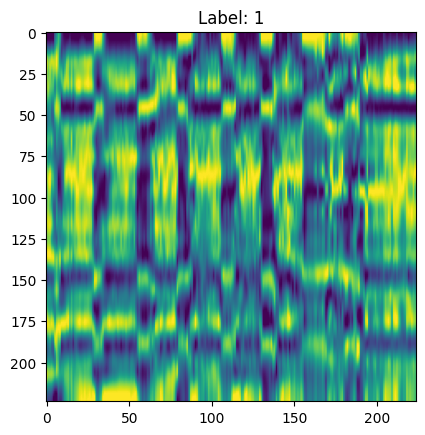

In [ ]:
import matplotlib.pyplot as plt
image = ds['train'][190]['image']
label = ds['train'][190]['label']

plt.imshow(image)
plt.title(f"Label: {label}")
plt.show()

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

(224, 224)


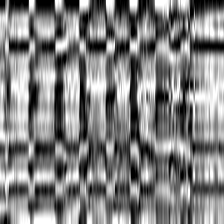

In [ ]:
image= ds['train'][190]['image']
image= np.array(image)
print(image.shape)
cv2_imshow(image)

(224, 224)


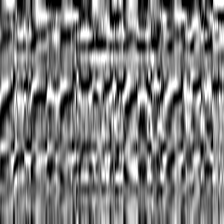

In [ ]:
image= ds['train'][116]['image']
image= np.array(image)
print(image.shape)
cv2_imshow(image)

In [ ]:
ds['train'].shape

(114035, 3)

In [ ]:
ds.shape

{'train': (114035, 3)}

In [ ]:
ds['train'][1450]['label']

1

In [ ]:
# Define a function to update the labels
def update_labels(example):
    # Merge labels 0 and 1 to 0, and change label 2 to 1
    if example['label'] in [0, 1]:
        example['label'] = 0
    elif example['label'] == 2:
        example['label'] = 1
    return example

# Apply the label transformation to the 'train' split
ds['train'] = ds['train'].map(update_labels)

Map:   0%|          | 0/114035 [00:00<?, ? examples/s]

In [ ]:
from collections import Counter
labels= ds['train']['label']
# Use Counter to count occurrences of each label
label_counts = Counter(labels)
print(label_counts)

Counter({0: 106580, 1: 7455})


In [ ]:
import random
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict, concatenate_datasets

# Extract the data for both labels
class_0_data = ds['train'].filter(lambda example: example['label'] == 0)
class_1_data = ds['train'].filter(lambda example: example['label'] == 1)

# random.seed(42)  # For reproducibility
class_0_sampled = class_0_data.shuffle(seed=42).select(range(len(class_1_data)))

balanced_dataset = concatenate_datasets([class_0_sampled, class_1_data]).shuffle(seed=42)

class_0_count = len(class_0_sampled)
class_1_count = len(class_1_data)
print(f"Class 0 count: {class_0_count}")
print(f"Class 1 count: {class_1_count}")

balanced_dataset = concatenate_datasets([class_0_sampled, class_1_data]).shuffle(seed=42)
print(balanced_dataset.shape)

# First, split into 90% train+val and 10% test
train_val_test = balanced_dataset.train_test_split(test_size=0.1, seed=42)
train_val_data = train_val_test['train']
test_data = train_val_test['test']

# Now split the 90% into 70% train and 20% validation
train_val_split = train_val_data.train_test_split(test_size=0.2, seed=42)
train_data = train_val_split['train']
val_data = train_val_split['test']

# Create a DatasetDict
dataset_dict = DatasetDict({
    'train': train_data,
    'val': val_data,
    'test': test_data
})

print(dataset_dict['train'].shape)
print(dataset_dict['val'].shape)
print(dataset_dict['test'].shape)

Filter:   0%|          | 0/114035 [00:00<?, ? examples/s]

Filter:   0%|          | 0/114035 [00:00<?, ? examples/s]

Class 0 count: 7455
Class 1 count: 7455
(14910, 3)
(10735, 3)
(2684, 3)
(1491, 3)


In [ ]:
from torch.utils.data import Dataset
# Define a custom dataset class to handle your Hugging Face dataset
class EEGDataset(Dataset):
    def __init__(self, dataset_dict, split, transform=None):
        self.dataset = dataset_dict[split]
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # Extract the image and label from the Hugging Face dataset
        image = self.dataset[idx]['image']
        label = self.dataset[idx]['label']

        # Apply any transformations (e.g., resizing, normalization)
        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
from torchvision import transforms

# Define image transformations
transform = transforms.Compose([
    transforms.Grayscale(),  # Convert to grayscale if not already
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize grayscale image
])

In [ ]:
class_names= ['No Seizzures', 'Seizure']

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [ ]:
# size calculation
def cnn_size_calc(n, k, s, p):
    return ((n - k + 2*p)/s) + 1
cnn_size_calc(112, 3, 1, 1)

112.0

In [ ]:
112/2/2

28.0

In [ ]:
# Define the CNN Model
class SeizureDetectionCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SeizureDetectionCNN, self).__init__()
        self.conv1= nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1) # 32, 224, 224

        self.pool= nn.MaxPool2d(kernel_size=2, stride=2) # 32, 112, 112

        self.conv2= nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1) # 64, 112, 112 -> 64, 56, 56
        self.conv3= nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1) # 128, 56, 56 -> 128, 28, 28
        self.conv4= nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1) # 256, 28, 28 -> 256, 14, 14

        # Adding Batch Normalization
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)

        self.dropout = nn.Dropout(p=0.5)  # Dropout with a probability of 50%

        self.fc1= nn.Linear(256*14*14, 120)
        self.fc2= nn.Linear(120, 32)
        self.fc3= nn.Linear(32, num_classes)

    def forward(self, x):
        # x = self.pool(F.relu(self.conv1(x)))
        # x = self.pool(F.relu(self.conv2(x)))
        # x = self.pool(F.relu(self.conv3(x)))
        # x = self.pool(F.relu(self.conv4(x)))
        # x = torch.flatten(x, 1)
        # x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # x = self.fc3(x)
        # return x
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # 32, 112, 112
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # 64, 56, 56
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # 128, 28, 28
        x = self.pool(F.relu(self.bn4(self.conv4(x))))  # 256, 14, 14

        x = torch.flatten(x, 1)
        x = self.dropout(F.relu(self.fc1(x)))  # Apply dropout
        x = self.dropout(F.relu(self.fc2(x)))  # Apply dropout
        x = self.fc3(x)
        return x

In [ ]:
from torchsummary import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming you have defined your model as 'SeizureDetectionCNN'
model = SeizureDetectionCNN().to(device)

# You need to specify the input size for the summary
# (assuming your input image size is 256x256x1)
image_size = np.array(dataset_dict['train'][0]['image']).shape
print(image_size)

# Print the model summary
# summary(model, image_size)
summary(model, input_size=(1, 224, 224))

(224, 224)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             320
       BatchNorm2d-2         [-1, 32, 224, 224]              64
         MaxPool2d-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 64, 112, 112]          18,496
       BatchNorm2d-5         [-1, 64, 112, 112]             128
         MaxPool2d-6           [-1, 64, 56, 56]               0
            Conv2d-7          [-1, 128, 56, 56]          73,856
       BatchNorm2d-8          [-1, 128, 56, 56]             256
         MaxPool2d-9          [-1, 128, 28, 28]               0
           Conv2d-10          [-1, 256, 28, 28]         295,168
      BatchNorm2d-11          [-1, 256, 28, 28]             512
        MaxPool2d-12          [-1, 256, 14, 14]               0
           Linear-13                  [-1, 120]       6,021,240
          Dropout-14        

In [ ]:
train_loader= EEGDataset(dataset_dict, 'train', transform)
val_loader= EEGDataset(dataset_dict, 'val', transform)
test_loader= EEGDataset(dataset_dict, 'test', transform)

In [ ]:
train_loader= DataLoader(train_loader, batch_size=32, shuffle=True)
val_loader= DataLoader(val_loader, batch_size=32, shuffle=True)
test_loader= DataLoader(test_loader, batch_size=32, shuffle=True)

In [ ]:
train_loader.dataset.__getitem__(0)[0].shape

torch.Size([1, 224, 224])

In [ ]:
# epochs= 20
# net= SeizureDetectionCNN().to(device)
# optimizer= optim.Adam(net.parameters(), lr=0.001)
# criterion= nn.CrossEntropyLoss()

# for epoch in range(epochs):
#   print(f"training epoch {epoch+1}...")

#   running_loss= 0.0

#   for i, data in enumerate(train_loader):
#     inputs, labels= data
#     inputs, labels= inputs.to(device), labels.to(device)
#     optimizer.zero_grad()

#     outputs= net(inputs)
#     loss= criterion(outputs, labels)
#     loss.backward()
#     optimizer.step()

#     running_loss += loss.item()

#   print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

training epoch 1...


KeyboardInterrupt: 

Training epoch 1...


100%|██████████| 336/336 [00:35<00:00,  9.48it/s]


Epoch 1, Train Loss: 0.8709, Train Accuracy: 0.6145, Val Loss: 0.6005, Val Accuracy: 0.6915
Training epoch 2...


100%|██████████| 336/336 [00:35<00:00,  9.57it/s]


Epoch 2, Train Loss: 0.5911, Train Accuracy: 0.6934, Val Loss: 0.5325, Val Accuracy: 0.7452
Training epoch 3...


100%|██████████| 336/336 [00:34<00:00,  9.68it/s]


Epoch 3, Train Loss: 0.5525, Train Accuracy: 0.7103, Val Loss: 0.5037, Val Accuracy: 0.7556
Training epoch 4...


100%|██████████| 336/336 [00:34<00:00,  9.68it/s]


Epoch 4, Train Loss: 0.5271, Train Accuracy: 0.7425, Val Loss: 0.5080, Val Accuracy: 0.7433
Training epoch 5...


100%|██████████| 336/336 [00:34<00:00,  9.69it/s]


Epoch 5, Train Loss: 0.5088, Train Accuracy: 0.7545, Val Loss: 0.4551, Val Accuracy: 0.7962
Training epoch 6...


100%|██████████| 336/336 [00:34<00:00,  9.70it/s]


Epoch 6, Train Loss: 0.4895, Train Accuracy: 0.7701, Val Loss: 0.4618, Val Accuracy: 0.7772
Training epoch 7...


100%|██████████| 336/336 [00:34<00:00,  9.65it/s]


Epoch 7, Train Loss: 0.4766, Train Accuracy: 0.7786, Val Loss: 0.4848, Val Accuracy: 0.7604
Training epoch 8...


100%|██████████| 336/336 [00:34<00:00,  9.62it/s]


Epoch 8, Train Loss: 0.4661, Train Accuracy: 0.7854, Val Loss: 0.4209, Val Accuracy: 0.8189
Training epoch 9...


100%|██████████| 336/336 [00:34<00:00,  9.62it/s]


Epoch 9, Train Loss: 0.4492, Train Accuracy: 0.7928, Val Loss: 0.4077, Val Accuracy: 0.8159
Training epoch 10...


100%|██████████| 336/336 [00:34<00:00,  9.70it/s]


Epoch 10, Train Loss: 0.4430, Train Accuracy: 0.7950, Val Loss: 0.4217, Val Accuracy: 0.7951
Training epoch 11...


100%|██████████| 336/336 [00:34<00:00,  9.64it/s]


Epoch 11, Train Loss: 0.4318, Train Accuracy: 0.8054, Val Loss: 0.3928, Val Accuracy: 0.8316
Training epoch 12...


100%|██████████| 336/336 [00:34<00:00,  9.63it/s]


Epoch 12, Train Loss: 0.4146, Train Accuracy: 0.8168, Val Loss: 0.3848, Val Accuracy: 0.8282
Training epoch 13...


100%|██████████| 336/336 [00:34<00:00,  9.71it/s]


Epoch 13, Train Loss: 0.4173, Train Accuracy: 0.8139, Val Loss: 0.4104, Val Accuracy: 0.8294
Training epoch 14...


100%|██████████| 336/336 [00:34<00:00,  9.70it/s]


Epoch 14, Train Loss: 0.3888, Train Accuracy: 0.8327, Val Loss: 0.3691, Val Accuracy: 0.8435
Training epoch 15...


100%|██████████| 336/336 [00:35<00:00,  9.59it/s]


Epoch 15, Train Loss: 0.3778, Train Accuracy: 0.8379, Val Loss: 0.3835, Val Accuracy: 0.8390
Training epoch 16...


100%|██████████| 336/336 [00:35<00:00,  9.53it/s]


Epoch 16, Train Loss: 0.3701, Train Accuracy: 0.8435, Val Loss: 0.3788, Val Accuracy: 0.8335
Training epoch 17...


100%|██████████| 336/336 [00:34<00:00,  9.66it/s]


Epoch 17, Train Loss: 0.3597, Train Accuracy: 0.8490, Val Loss: 0.3386, Val Accuracy: 0.8588
Training epoch 18...


100%|██████████| 336/336 [00:34<00:00,  9.69it/s]


Epoch 18, Train Loss: 0.3535, Train Accuracy: 0.8551, Val Loss: 0.3340, Val Accuracy: 0.8614
Training epoch 19...


100%|██████████| 336/336 [00:34<00:00,  9.67it/s]


Epoch 19, Train Loss: 0.3341, Train Accuracy: 0.8625, Val Loss: 0.3380, Val Accuracy: 0.8551
Training epoch 20...


100%|██████████| 336/336 [00:34<00:00,  9.63it/s]


Epoch 20, Train Loss: 0.3228, Train Accuracy: 0.8665, Val Loss: 0.3246, Val Accuracy: 0.8674


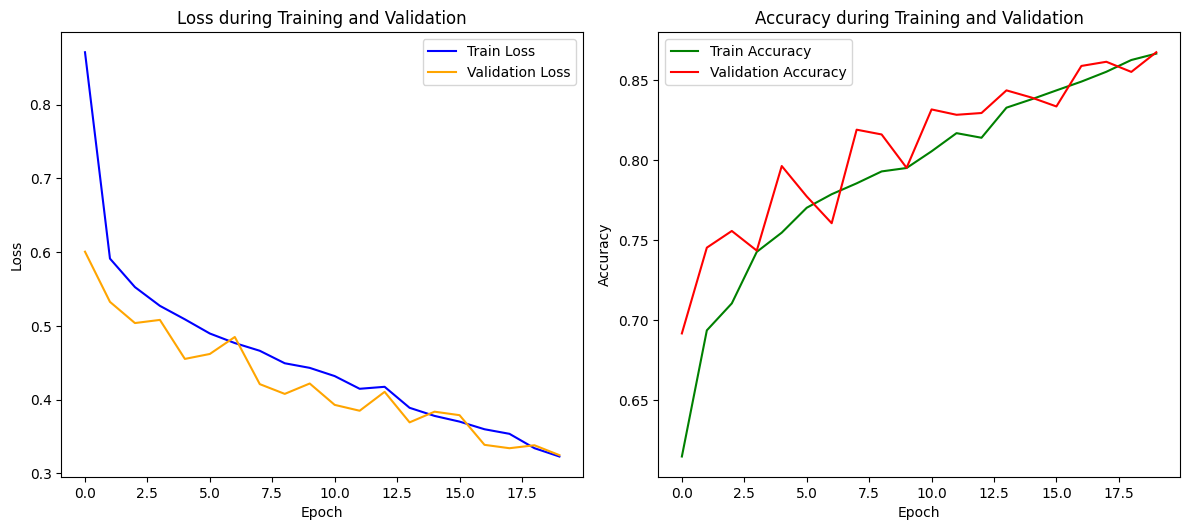

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

# Assuming you have your dataset and model defined as 'SeizureDetectionCNN'
# Initialize model, optimizer, criterion, and device
epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = SeizureDetectionCNN().to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Lists to store losses and accuracies
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Function for validation
def validate_model(model, val_loader, criterion, device):
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation for validation
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Accumulate loss
            running_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)  # Get the predicted classes
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  # Count correct predictions

    epoch_loss = running_loss / len(val_loader)
    epoch_accuracy = correct / total
    return epoch_loss, epoch_accuracy

# Training loop
for epoch in range(epochs):
    print(f"Training epoch {epoch + 1}...")

    net.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Use tqdm to visualize training progress
    for i, data in tqdm(enumerate(train_loader), total=len(train_loader)):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)  # Get the predicted classes
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  # Count correct predictions

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct / total

    # Validation step
    val_loss, val_accuracy = validate_model(net, val_loader, criterion, device)

    # Store losses and accuracies
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Plotting Loss and Accuracy
plt.figure(figsize=(12, 10))

# Plot Train Loss and Val Loss
plt.subplot(2, 2, 1)
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Loss during Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Train Accuracy and Val Accuracy
plt.subplot(2, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy', color='green')
plt.plot(val_accuracies, label='Validation Accuracy', color='red')
plt.title('Accuracy during Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
torch.save(net.state_dict(), 'seizure_detection_model.pth')

from safetensors.torch import save_file

save_file(net.state_dict(), 'seizure_detection_model.safetensors')


In [ ]:
# prompt: save the model as a pickefile

import pickle

# Save the model as a pickle file
with open('seizure_detection_model.pkl', 'wb') as f:
    pickle.dump(net, f)
